<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Spam emails detection

</div>


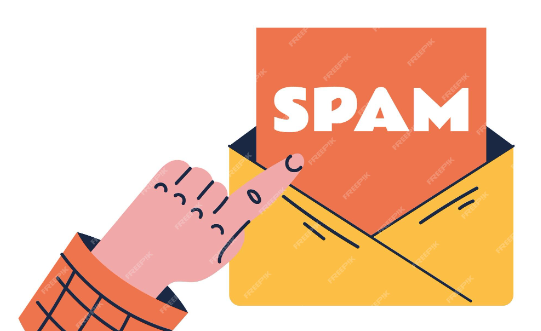


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Spam Detection Project Overview</h1>
  <p>This project aims to develop a robust spam detection system by comparing the performance of an advanced language model, RoBERTa, with a simpler logistic regression approach. The objective is to explore the effectiveness of these methods in identifying spam emails through comprehensive text preprocessing and model tuning.</p>
  
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Initial Data Preparation:</h2>
  <p>The process begins with loading a dataset containing email text, labeled as spam or ham (non-spam). Using the <code>pandas</code> library, the data is organized into a DataFrame for efficient manipulation. This initial step is crucial for setting the foundation for subsequent preprocessing tasks.</p>
  
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Text Cleaning and Normalization:</h2>
  <p>The next phase involves thorough text cleaning to eliminate elements that could introduce noise into the models. A custom function is employed to remove punctuation, numerical digits, and convert text to lowercase, ensuring uniformity across the dataset. These steps are essential to enhance the model's ability to accurately classify the text.</p>
  
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Stopwords Removal:</h2>
  <p>Further refining the text data, stopwords—common words like 'the', 'and', 'is'—are removed to reduce unnecessary noise. This step helps in focusing the model on the most meaningful parts of the text, improving its performance in distinguishing between spam and ham emails.</p>
  
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Modeling and Comparison:</h2>
  <p>The project will compare two approaches: the advanced RoBERTa model, fine-tuned for this specific task, and a simpler logistic regression model. Hyperparameters for RoBERTa will be optimized using the Optuna library, ensuring the best possible performance. The results will be evaluated based on key metrics like accuracy and F1-score, providing insights into the most effective method for spam detection.</p>
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Data loading

</div>


In [46]:
import pandas as pd

# Path to the CSV file
file_path = 'emails.csv'

# Loading the CSV file into a DataFrame, keeping only the first two columns
df = pd.read_csv(file_path, usecols=[0, 1])

# Displaying the first few rows of the DataFrame
df.head()


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Text Preprocessing and Data Preparation

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;"></h1>
  <p>This code segment is focused on preparing textual data for further analysis and modeling. The goal is to clean and standardize the text, making it ready for machine learning tasks like classification or clustering.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Data Loading and Initial Preparation:</h2>
  <p>The process begins with loading the dataset using the <code>pandas</code> library. The dataset, in this case, is a CSV file containing email text data. Loading the data into a DataFrame allows for efficient manipulation and preprocessing.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Text Cleaning and Normalization:</h2>
  <p>The core of this segment involves cleaning the text data to remove unnecessary elements that could introduce noise into the model. This is achieved through a custom function that removes punctuation marks and numerical digits from the text. The text is also converted to lowercase to ensure consistency, as machine learning models typically treat uppercase and lowercase letters as different entities.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Stopwords removal:</h2>
  <p>While the current cleaning steps are effective, additional preprocessing techniques could further improve the quality of the data. For instance, removing stopwords (common words like 'the', 'and', 'is') could help reduce noise.</p>
</div>

In [47]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split



# Pobranie listy stopwords
stop_words = set(stopwords.words('english'))

# Czyszczenie tekstu
def clean_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['text'] = df['text'].apply(clean_text)

df.head()

,text,spam
0,subject naturally irresistible corporate ident...,1
1,subject stock trading gunslinger fanny merrill...,1
2,subject unbelievable new homes made easy im wa...,1
3,subject color printing special request additio...,1
4,subject money get software cds software compat...,1


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Text Lemmatization and Cleaning

</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;"></h1>
  <p>This code snippet is designed to preprocess text data by lemmatizing it, a crucial step in preparing the text for advanced analysis and machine learning tasks. By standardizing the text and removing unnecessary elements, it helps in making the data more uniform and suitable for various NLP applications.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Lemmatization Process:</h2>
  <p>The lemmatization process involves converting words to their base or root form. For example, the words 'running', 'ran', and 'runs' are reduced to their base form 'run'. This standardization helps in reducing the dimensionality of the text data and ensures that different forms of a word are treated as the same entity, which is particularly useful for tasks like text classification or clustering.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Stopwords Removal:</h2>
  <p>Additionally, the code removes stopwords—common words such as 'the', 'is', and 'in'—that often do not contribute significant meaning to the text analysis. By excluding these words, the data becomes cleaner and more focused on the content that truly matters for further analysis.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Application in DataFrames:</h2>
  <p>The function is applied to each row of the DataFrame column 'text', transforming the text data by lemmatizing and filtering out stopwords. This preprocessing step is essential for ensuring that the text data is in an optimal form for subsequent analysis, such as feature extraction or model training.</p>
</div>







In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd

# Pobierz zasoby potrzebne do lematyzacji
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Inicjalizuj lematyzator i listę stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def lemmatize_text(text):
    # Tokenizacja tekstu
    tokens = word_tokenize(text)
    
    # Lematyzacja i usuwanie stopwords
    lemmatized_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words]
    
    # Łączenie tokenów w jeden string
    return " ".join(lemmatized_tokens)

# Zastosowanie funkcji lematyzacji do kolumny 'text'
df['text'] = df['text'].apply(lemmatize_text)

print(df)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\weron\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\weron\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\weron\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                   text  spam
0     subject naturally irresistible corporate ident...     1
1     subject stock trading gunslinger fanny merrill...     1
2     subject unbelievable new home made easy im wan...     1
3     subject color printing special request additio...     1
4     subject money get software cd software compati...     1
...                                                 ...   ...
5721  subject research development charge gpg forwar...     0
5722  subject receipt visit jim thanks invitation vi...     0
5723  subject enron case study update wow day super ...     0
5724  subject interest david please call shirley cre...     0
5725  subject news aurora update aurora version fast...     0

[5726 rows x 2 columns]


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# ROBERTA Tokenizations

</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;"></h1>
  <p>This code snippet is designed to prepare text data for model training using the RoBERTa transformer model. It handles the tokenization of text, a critical step in converting raw text into a format that can be effectively processed by the model. The tokenization process ensures that the text is broken down into manageable units (tokens) while maintaining the integrity of the original information.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Tokenization with RoBERTa:</h2>
  <p>The tokenization process in this code utilizes the RoBERTa tokenizer, which is tailored specifically for the RoBERTa model. This tokenizer splits the text into smaller units, known as subwords, which allows the model to handle rare and unknown words more effectively. Additionally, the tokenizer automatically adds special tokens required by the RoBERTa model, such as the CLS (classification) token and SEP (separator) token.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Padding and Truncation:</h2>
  <p>To ensure that all tokenized sequences have the same length, padding is added to shorter sequences, and longer sequences are truncated to a specified maximum length. This step is essential for maintaining consistent input sizes when feeding data into the model, which is crucial for batch processing during training.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Data Splitting:</h2>
  <p>The dataset is divided into training and testing sets, with 80% of the data used for training and 20% reserved for testing. This ensures that the model is trained on one subset of the data and then evaluated on another, helping to assess its performance on unseen data.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Application in DataFrames:</h2>
  <p>The tokenization function is applied to both the training and testing text data, converting them into tensors compatible with PyTorch. These tensors are the input that the RoBERTa model will process during training and evaluation, allowing it to learn patterns from the text and make predictions, such as classifying messages as spam or not.</p>
</div>

In [8]:
from transformers import RobertaTokenizer
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset

# Inicjalizacja tokenizera RoBERTa
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Funkcja tokenizująca teksty
def tokenize_texts(texts, tokenizer, max_length=512):
    return tokenizer(
        texts.tolist(),
        padding=True,                      # Dodaj padding do najdłuższego tekstu w batchu
        truncation=True,                   # Przytnij tekst, jeśli jest dłuższy niż max_length
        max_length=max_length,             # Maksymalna długość sekwencji
        return_tensors='pt'                # Zwróć tensory PyTorch
    )

# Podział danych na zbiory: treningowy, walidacyjny i testowy
train_texts, temp_texts, y_train, temp_labels = train_test_split(df['text'], df['spam'], test_size=0.3, random_state=42)
val_texts, test_texts, y_val, y_test = train_test_split(temp_texts, temp_labels, test_size=0.5, random_state=42)

# Tokenizacja tekstów
train_encodings = tokenize_texts(train_texts, tokenizer)
val_encodings = tokenize_texts(val_texts, tokenizer)
test_encodings = tokenize_texts(test_texts, tokenizer)



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# TF-IDF Vectorization

</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Custom Dataset for Spam Classification</h1>
  <p>This code snippet defines a custom `SpamDataset` class that extends the PyTorch `Dataset` class. It is specifically designed to handle the preprocessed text data and associated labels, making it easier to work with the PyTorch DataLoader during model training and evaluation.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Why Create a Custom Dataset?</h2>
  <p>Creating a custom dataset class like `SpamDataset` is necessary to properly manage how the text encodings (generated by the tokenizer) and their corresponding labels are stored and accessed during training. This approach ensures that the data is presented to the model in the correct format and structure.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Efficient Data Handling:</h2>
  <p>The custom dataset class allows for efficient handling of the data by encapsulating the encodings and labels together. It overrides two essential methods:</p>
  <ul>
    <li><strong>`__getitem__(self, idx)`:</strong> This method retrieves a single item (both the input data and its label) at a given index, ensuring that the data is correctly paired when passed to the model. It also converts the labels to PyTorch tensors, which are required for model training.</li>
    <li><strong>`__len__(self)`:</strong> This method returns the total number of samples in the dataset, which is necessary for iterating over the dataset during training.</li>
  </ul>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Integration with DataLoader:</h2>
  <p>By using a custom dataset, it becomes straightforward to integrate with the PyTorch DataLoader, which automates the process of batching, shuffling, and loading data during training. This setup is crucial for training deep learning models efficiently, as it allows for scalable and flexible data feeding to the model.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Dataset Preparation:</h2>
  <p>Finally, the code prepares the training and testing datasets by instantiating the `SpamDataset` class with the tokenized texts and their corresponding labels. These datasets will be used to train the model on the training data and evaluate its performance on the test data.</p>
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Predictions

</div>

In [5]:
print(df['spam'].unique())
df['spam'] = df['spam'].astype(int)


[1 0]


In [10]:
class SpamDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels.iloc[idx]).long()  # Konwersja etykiet na tensor typu long
        return item

    def __len__(self):
        return len(self.labels)

# Przygotowanie datasetów
train_dataset = SpamDataset(train_encodings, y_train)
val_dataset = SpamDataset(val_encodings, y_val)
test_dataset = SpamDataset(test_encodings, y_test)


In [13]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset
import logging

# Inicjalizacja tokenizera RoBERTa
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Funkcja tokenizująca teksty
def tokenize_texts(texts, tokenizer, max_length=512):
    return tokenizer(
        texts.tolist(),
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors='pt'
    )

# Podział danych na zbiory: treningowy, walidacyjny i testowy
train_texts, temp_texts, y_train, temp_labels = train_test_split(df['text'], df['spam'], test_size=0.3, random_state=42)
val_texts, test_texts, y_val, y_test = train_test_split(temp_texts, temp_labels, test_size=0.5, random_state=42)

# Tokenizacja tekstów
train_encodings = tokenize_texts(train_texts, tokenizer)
val_encodings = tokenize_texts(val_texts, tokenizer)
test_encodings = tokenize_texts(test_texts, tokenizer)

# Dataset
class SpamDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels.iloc[idx]).long()
        return item

    def __len__(self):
        return len(self.labels)

# Przygotowanie datasetów
train_dataset = SpamDataset(train_encodings, y_train)
val_dataset = SpamDataset(val_encodings, y_val)
test_dataset = SpamDataset(test_encodings, y_test)

# Ustawienia loggingu
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Wczytaj model
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)

# Przygotowanie argumentów treningowych
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    warmup_steps=200,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,
    evaluation_strategy="steps",
    save_steps=100,
    save_total_limit=1,
    dataloader_num_workers=0,  # Zmniejszenie liczby wątków
    logging_first_step=True,
)

# Inicjalizacja trenera
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Trenowanie modelu
trainer.train()


loading file https://huggingface.co/roberta-base/resolve/main/vocab.json from cache at C:\Users\weron/.cache\huggingface\transformers\d3ccdbfeb9aaa747ef20432d4976c32ee3fa69663b379deb253ccfce2bb1fdc5.d67d6b367eb24ab43b08ad55e014cf254076934f71d832bbab9ad35644a375ab
loading file https://huggingface.co/roberta-base/resolve/main/merges.txt from cache at C:\Users\weron/.cache\huggingface\transformers\cafdecc90fcab17011e12ac813dd574b4b3fea39da6dd817813efa010262ff3f.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
loading file https://huggingface.co/roberta-base/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/roberta-base/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/roberta-base/resolve/main/tokenizer_config.json from cache at C:\Users\weron/.cache\huggingface\transformers\dfe8f1ad04cb25b61a647e3d13620f9bf0a0f51d277897b232a5735297134132.024cc07195c0ba0b51d4f80061c6115996ff26233f3d04788855b23cdf

Step,Training Loss,Validation Loss
100,0.482400,0.263708
200,0.293300,0.214559
300,0.313300,0.582790
400,0.221800,0.371928
500,0.164100,0.185307
600,0.118700,0.186094
700,0.117200,0.101021
800,0.077300,0.163850
900,0.090000,0.124337
1000,0.042600,0.122247


***** Running Evaluation *****
  Num examples = 859
  Batch size = 4
Saving model checkpoint to ./results\checkpoint-100
Configuration saved in ./results\checkpoint-100\config.json
Model weights saved in ./results\checkpoint-100\pytorch_model.bin
Deleting older checkpoint [results\checkpoint-2000] due to args.save_total_limit
Deleting older checkpoint [results\checkpoint-2500] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 859
  Batch size = 4
Saving model checkpoint to ./results\checkpoint-200
Configuration saved in ./results\checkpoint-200\config.json
Model weights saved in ./results\checkpoint-200\pytorch_model.bin
Deleting older checkpoint [results\checkpoint-100] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 859
  Batch size = 4
Saving model checkpoint to ./results\checkpoint-300
Configuration saved in ./results\checkpoint-300\config.json
Model weights saved in ./results\checkpoint-300\pytorch_model.bin
Deleting older ch

TrainOutput(global_step=1002, training_loss=0.19188686724119688, metrics={'train_runtime': 69808.0224, 'train_samples_per_second': 0.057, 'train_steps_per_second': 0.014, 'total_flos': 1054549109882880.0, 'train_loss': 0.19188686724119688, 'epoch': 1.0})

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Predictions check

</div>

In [22]:
# Przykładowy tekst do klasyfikacji
sample_text = "Subject: london status report - research weather effort  vince ,  fyi to give you background for tomorrow ' s telephone conference  steve is really a home - run hitter  mike  - - - - - - - - - - - - - - - - - - - - - - forwarded by mike a roberts / hou / ect on 04 / 12 / 2001  09 : 26 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  enron north america corp .  from : stephen bennett @ enron 0."

# Tokenizacja tekstu
sample_encoding = tokenize_texts([sample_text], tokenizer)

# Utwórz tensor z tokenizowanymi danymi
input_ids = sample_encoding['input_ids']
attention_mask = sample_encoding['attention_mask']

# Przewidywanie
model.eval()  # Ustaw model w tryb oceny
with torch.no_grad():
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    
# Wyciągnięcie przewidywanych klas
logits = outputs.logits
predicted_class = torch.argmax(logits, dim=1).item()

# Wydrukowanie wyniku
print(f"Predicted class: {'spam' if predicted_class == 1 else 'not spam'}")


Predicted class: not spam


In [23]:
# Przykładowy tekst do klasyfikacji
sample_text = "Subject: : : fast acting viagra  at  last ( fast acting viagra )  removal  instructions : you  have received this advertisement because you have opted "

# Tokenizacja tekstu
sample_encoding = tokenize_texts([sample_text], tokenizer)

# Utwórz tensor z tokenizowanymi danymi
input_ids = sample_encoding['input_ids']
attention_mask = sample_encoding['attention_mask']

# Przewidywanie
model.eval()  # Ustaw model w tryb oceny
with torch.no_grad():
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    
# Wyciągnięcie przewidywanych klas
logits = outputs.logits
predicted_class = torch.argmax(logits, dim=1).item()

# Wydrukowanie wyniku
print(f"Predicted class: {'spam' if predicted_class == 1 else 'not spam'}")


Predicted class: spam


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# ROBERTA model evaluation
</div>

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm
import torch

# Przewidywanie etykiet dla zbioru testowego
model.eval()
all_preds = []
all_labels = []

# Ustaw dataloader do iteracji
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=False)

# Inicjalizacja paska postępu
for batch in tqdm(test_dataloader, desc="Evaluating"):
    input_ids = batch['input_ids']
    attention_mask = batch['attention_mask']
    labels = batch['labels']
    
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        
    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

# Obliczanie metryk
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Evaluating: 100%|██████████| 215/215 [19:09<00:00,  5.35s/it]

Accuracy: 0.9814
Precision: 0.9862
Recall: 0.9427
F1 Score: 0.9640


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Spam Classification Model Results</h1>
  
  <p>Congratulations! Your model has performed exceptionally well. Here’s a summary of the metrics:</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Accuracy: 0.9814</h2>
  <p>Indicates that the model correctly classified 98.14% of the test samples. This high accuracy shows strong performance in distinguishing both spam and non-spam.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Precision: 0.9862</h2>
  <p>Measures how accurate the positive predictions are. A precision of 98.62% means the model rarely misclassifies non-spam as spam, resulting in few false positives.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Recall: 0.9427</h2>
  <p>Measures how well the model identifies all actual positive cases (spam). A recall of 94.27% suggests some spam instances may be missed (false negatives).</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">F1 Score: 0.9640</h2>
  <p>F1 Score is the harmonic mean of precision and recall. A score of 0.9640 indicates a good balance between precision and recall, highlighting overall effectiveness.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Interpretation:</h2>
  <p>The high precision suggests the model is very reliable in not labeling non-spam as spam. The slightly lower recall means some spam might be missed. Overall, the model is well-balanced and effective.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Next Steps:</h2>
  <ul>
    <li>Adjust the decision threshold if you want to increase recall at the expense of precision.</li>
    <li>Consider further training on a larger dataset or advanced fine-tuning techniques if needed.</li>
  </ul>
  
  <p>Overall, the results are impressive and suggest that the model is effective in spam detection!</p>
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Maybe easier way? Logistic regression
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Model Comparison: Logistic Regression vs. RoBERTa</h1>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Logistic Regression:</h2>
  <ul>
    <li><strong>Simplicity:</strong> Simple and easy to understand, quick to train.</li>
    <li><strong>Performance:</strong> Works well on smaller, well-structured datasets with text features extracted via TF-IDF or similar methods.</li>
    <li><strong>Resources:</strong> Requires significantly fewer computational resources, can be trained on a standard computer.</li>
    <li><strong>Accuracy:</strong> Can achieve satisfactory accuracy with well-chosen features but has limited capabilities with more complex texts.</li>
  </ul>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">RoBERTa (Transformers):</h2>
  <ul>
    <li><strong>Complexity:</strong> Advanced NLP model that understands word context within sentences.</li>
    <li><strong>Performance:</strong> Shows superior results in NLP tasks, including spam classification, by considering context rather than individual words.</li>
    <li><strong>Resources:</strong> Requires significantly more computational resources (GPU, large RAM), making training and predictions more costly and time-consuming.</li>
    <li><strong>Accuracy:</strong> Typically achieves much higher accuracy compared to simpler models, especially on large, complex text datasets.</li>
  </ul>
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Tokenisation or vectorisation?
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Tokenization vs. Vectorization</h1>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Tokenization (e.g., RoBERTa):</h2>
  <ul>
    <li><strong>Purpose:</strong> Converts text into a sequence of tokens (e.g., words or subwords) for processing by transformer models.</li>
    <li><strong>How It Works:</strong> Breaks text into tokens and maps them to unique numerical IDs using a vocabulary.</li>
    <li><strong>Example:</strong> "transformer" might be tokenized into ["trans", "form", "er"] with corresponding IDs [123, 456, 789].</li>
    <li><strong>Need:</strong> Enables understanding of context and complex text structures in models like RoBERTa.</li>
  </ul>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Vectorization (e.g., Logistic Regression):</h2>
  <ul>
    <li><strong>Purpose:</strong> Converts text into numerical features for use with traditional machine learning algorithms.</li>
    <li><strong>How It Works:</strong> Methods like TF-IDF create a matrix of text features, where each entry represents the significance of a word in a document.</li>
    <li><strong>Example:</strong> TF-IDF transforms text into a matrix where each cell represents the importance of a word in the document.</li>
    <li><strong>Need:</strong> Provides numerical data for models to find patterns, as traditional algorithms do not understand text context.</li>
  </ul>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Summary:</h2>
  <p>Tokenization is used in models like RoBERTa to convert text into tokens that capture context. Vectorization, used in models like logistic regression, converts text into numerical features for pattern recognition. Both methods serve different purposes based on the model and task.</p>
</div>


In [ ]:
# Funkcja tokenizująca teksty
def tokenize_texts(texts, tokenizer, max_length=512):
    return tokenizer(
        texts,
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors='pt'
    )

In [30]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm  # Import tqdm dla paska postępu

# 1. Pobranie danych
# Zakładam, że dane są już wczytane do DataFrame df, np.:
# df = pd.read_csv('spam_data.csv')

# 2. Inicjalizacja zasobów NLTK
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# 3. Czyszczenie tekstu
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Usuwanie znaków interpunkcyjnych
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Usuwanie liczb
    text = re.sub(r'\d+', '', text)
    # Konwersja tekstu na małe litery
    text = text.lower()
    # Usuwanie stopwords i lematyzacja
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

# Zastosowanie funkcji czyszczenia do kolumny 'text'
df['text'] = df['text'].apply(clean_text)

# 4. Wektoryzacja tekstu za pomocą TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Maksymalna liczba cech do użycia
X = vectorizer.fit_transform(df['text'])

# 5. Podział danych na zbiory: treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, df['spam'], test_size=0.3, random_state=42)

# 6. Trenowanie modelu regresji logistycznej z paskiem postępu
logreg = LogisticRegression(max_iter=1000)  # Ustawienie maksymalnej liczby iteracji

# Pasek postępu dla treningu
for _ in tqdm(range(1), desc="Training"):
    logreg.fit(X_train, y_train)

# 7. Przewidywanie etykiet dla zbioru testowego z paskiem postępu
y_pred = []
for i in tqdm(range(len(X_test.toarray())), desc="Predicting"):
    y_pred.append(logreg.predict(X_test[i]))

# 8. Obliczanie metryk
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 9. Wyświetlanie wyników
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\weron\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\weron\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\weron\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Predicting: 100%|██████████| 1718/1718 [00:00<00:00, 2703.08it/s]

Accuracy: 0.9756
Precision: 0.9926
Recall: 0.9116
F1 Score: 0.9504


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Models comparison
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Model Comparison: RoBERTa vs. Logistic Regression</h1>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Key Metrics:</h2>
  <ul>
    <li><strong>Accuracy:</strong> RoBERTa: 0.9814 vs. Logistic Regression: 0.9756</li>
    <li><strong>Precision:</strong> Logistic Regression: 0.9926 vs. RoBERTa: 0.9862</li>
    <li><strong>Recall:</strong> RoBERTa: 0.9427 vs. Logistic Regression: 0.9116</li>
    <li><strong>F1 Score:</strong> RoBERTa: 0.9640 vs. Logistic Regression: 0.9504</li>
  </ul>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Recommendation:</h2>
  <p><strong>RoBERTa:</strong> Better overall performance with higher recall and balanced F1 Score, ideal for complex tasks with higher accuracy needs.</p>
  <p><strong>Logistic Regression:</strong> Simpler and more resource-efficient with higher precision, suitable if minimizing false positives is crucial and resources are limited.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Which to Choose?</h2>
  <p>If you need maximum accuracy and can handle the resource demands, go with RoBERTa. If you're prioritizing speed and minimizing false positives with fewer resources, Logistic Regression is a solid choice.</p>
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# ROBERTa model tuning possibilities
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Improving Your RoBERTa Model</h1>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">1. Class Balancing</h2>
  <p>If your dataset has an imbalance between classes, the model may perform poorly on the minority class. To address this:</p>
  <ul>
    <li><strong>Class Weights:</strong> Adjust the loss function to assign higher weights to the minority class. This penalizes incorrect classifications of the minority class more heavily, helping the model learn better.</li>
    <li><strong>Oversampling/Undersampling:</strong> Use techniques like oversampling to duplicate instances of the minority class or undersampling to reduce the number of instances of the majority class. This can help balance the class distribution and improve model performance.</li>
  </ul>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">2. Increase Training Duration</h2>
  <p>Sometimes, the model might not fully converge within the initial number of epochs. Extending the training duration can help:</p>
  <ul>
    <li><strong>More Epochs:</strong> Increase the number of epochs to give the model more opportunities to learn from the data. Monitor the training and validation loss to prevent overfitting.</li>
  </ul>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">3. Hyperparameter Optimization</h2>
  <p>Tuning hyperparameters can significantly affect the model's performance. Consider:</p>
  <ul>
    <li><strong>Learning Rate:</strong> Experiment with different learning rates to find the optimal value for convergence.</li>
    <li><strong>Weight Decay:</strong> Adjust weight decay to control regularization and prevent overfitting.</li>
    <li><strong>Evaluation Strategies:</strong> Test various evaluation metrics and strategies to better understand how well the model performs.</li>
  </ul>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">4. Data Augmentation</h2>
  <p>Increasing the diversity of your training data can enhance model robustness. Techniques include:</p>
  <ul>
    <li><strong>Text Augmentation:</strong> Apply transformations such as synonym replacement, random insertion, or back-translation to generate additional training examples.</li>
  </ul>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">5. Cross-Validation</h2>
  <p>Cross-validation helps assess the model's performance more reliably. Implement the following:</p>
  <ul>
    <li><strong>K-Fold Cross-Validation:</strong> Split the dataset into k subsets and train the model k times, each time using a different subset as the validation set and the remaining as training data. This provides a more robust estimate of model performance.</li>
  </ul>
</div>


In [42]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset
import logging
import optuna
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, f1_score
import random

# Inicjalizacja NLTK
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Pobranie danych
# df = pd.read_csv('spam_data.csv')

# Czyszczenie tekstu
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

df['text'] = df['text'].apply(clean_text)

# Prosta technika augmentacji danych (przykład: zamiana słów na synonimy)
def synonym_replacement(text, n=2):
    words = text.split()
    new_words = words.copy()
    for _ in range(n):
        word_idx = random.randint(0, len(words) - 1)
        new_word = random.choice(words)  # Zamień na losowe słowo (możesz użyć słownika synonimów)
        new_words[word_idx] = new_word
    return ' '.join(new_words)

df['text'] = df['text'].apply(lambda x: synonym_replacement(x))

# Tokenizacja
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

def tokenize_texts(texts, tokenizer, max_length=512):
    encodings = tokenizer(
        list(texts),
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors='pt'
    )
    return encodings

train_texts, temp_texts, y_train, temp_labels = train_test_split(df['text'], df['spam'], test_size=0.3, random_state=42)
val_texts, test_texts, y_val, y_test = train_test_split(temp_texts, temp_labels, test_size=0.5, random_state=42)

train_encodings = tokenize_texts(train_texts, tokenizer)
val_encodings = tokenize_texts(val_texts, tokenizer)
test_encodings = tokenize_texts(test_texts, tokenizer)

class SpamDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels.iloc[idx]).long()
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = SpamDataset(train_encodings, y_train)
val_dataset = SpamDataset(val_encodings, y_val)
test_dataset = SpamDataset(test_encodings, y_test)

# Obliczanie wag klas
class_weights = compute_class_weight(class_weight='balanced', classes=[0, 1], y=df['spam'])
class_weights = torch.tensor(class_weights, dtype=torch.float32)

# Ustawienia loggingu
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Wczytaj model
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)

# Funkcja do obliczania metryk
def compute_metrics(p):
    predictions = p.predictions.argmax(-1)
    return {
        'accuracy': accuracy_score(p.label_ids, predictions),
        'f1': f1_score(p.label_ids, predictions, average='weighted')
    }

# Funkcja celu dla Optuny
def objective(trial):
    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=trial.suggest_int('num_train_epochs', 2, 5),
        per_device_train_batch_size=trial.suggest_int('per_device_train_batch_size', 4, 16),
        learning_rate=trial.suggest_loguniform('learning_rate', 1e-5, 1e-4),
        warmup_steps=trial.suggest_int('warmup_steps', 0, 1000),
        weight_decay=trial.suggest_uniform('weight_decay', 0.0, 0.1),
        logging_dir='./logs',
        logging_steps=100,
        evaluation_strategy="steps",
        save_steps=100,
        save_total_limit=1,
        dataloader_num_workers=0,
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=compute_metrics
    )
    
    trainer.train()
    eval_results = trainer.evaluate()
    return eval_results['eval_loss']

# Przeprowadzenie optymalizacji hiperparametrów
study = optuna.create_study(direction='minimize')

# Implementacja paska postępu
def callback(study, trial):
    print(f"Trial {trial.number} completed with loss: {trial.value}")

study.optimize(objective, n_trials=10, callbacks=[callback])

print(study.best_params)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\weron\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\weron\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\weron\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
loading file https://huggingface.co/roberta-base/resolve/main/vocab.json from cache at C:\Users\weron/.cache\huggingface\transformers\d3ccdbfeb9aaa747ef20432d4976c32ee3fa69663b379deb253ccfce2bb1fdc5.d67d6b367eb24ab43b08ad55e014cf254076934f71d832bbab9ad35644a375ab
loading file https://huggingface.co/roberta-base/resolve/main/merges.txt from cache at C:\Users\weron/.cache\huggingface\transformers\cafdecc90fcab17011e12ac813dd574b4b3fea39da6dd817813efa010262ff3f.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
load

Step,Training Loss,Validation Loss,Accuracy,F1
100,0.411800,0.102956,0.954598,0.954772
200,0.161900,0.082535,0.976717,0.976567
300,0.116100,0.073135,0.984866,0.984969
400,0.052800,0.108236,0.984866,0.984756
500,0.058100,0.108907,0.977881,0.977568


***** Running Evaluation *****
  Num examples = 859
  Batch size = 8
Saving model checkpoint to ./results\checkpoint-100
Configuration saved in ./results\checkpoint-100\config.json
Model weights saved in ./results\checkpoint-100\pytorch_model.bin
Deleting older checkpoint [results\checkpoint-1000] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 859
  Batch size = 8
Saving model checkpoint to ./results\checkpoint-200
Configuration saved in ./results\checkpoint-200\config.json
Model weights saved in ./results\checkpoint-200\pytorch_model.bin
Deleting older checkpoint [results\checkpoint-100] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 859
  Batch size = 8
Saving model checkpoint to ./results\checkpoint-300
Configuration saved in ./results\checkpoint-300\config.json
Model weights saved in ./results\checkpoint-300\pytorch_model.bin
Deleting older checkpoint [results\checkpoint-200] due to args.save_total_limit
***** Running Eval

[I 2024-08-17 16:21:35,194] Trial 0 finished with value: 0.13356517255306244 and parameters: {'num_train_epochs': 2, 'per_device_train_batch_size': 14, 'learning_rate': 4.2960463712472855e-05, 'warmup_steps': 295, 'weight_decay': 0.009656519283447008}. Best is trial 0 with value: 0.13356517255306244.
C:\Users\weron\AppData\Local\Temp/ipykernel_35368/4140606430.py:112: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform('learning_rate', 1e-5, 1e-4),
C:\Users\weron\AppData\Local\Temp/ipykernel_35368/4140606430.py:114: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay=trial.suggest_uniform('weight_decay', 0.0, 0.1),
using `logging_steps` to initiali

Trial 0 completed with loss: 0.13356517255306244


C:\Users\weron\Anaconda3\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 4008
  Num Epochs = 4
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 1004


Step,Training Loss,Validation Loss


[W 2024-08-17 16:43:09,065] Trial 1 failed with parameters: {'num_train_epochs': 4, 'per_device_train_batch_size': 16, 'learning_rate': 5.842898598852553e-05, 'warmup_steps': 988, 'weight_decay': 0.02681257841049789} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\weron\Anaconda3\lib\site-packages\optuna\study\_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\weron\AppData\Local\Temp/ipykernel_35368/4140606430.py", line 131, in objective
    trainer.train()
  File "C:\Users\weron\Anaconda3\lib\site-packages\transformers\trainer.py", line 1400, in train
    tr_loss_step = self.training_step(model, inputs)
  File "C:\Users\weron\Anaconda3\lib\site-packages\transformers\trainer.py", line 2002, in training_step
    loss.backward()
  File "C:\Users\weron\Anaconda3\lib\site-packages\torch\_tensor.py", line 363, in backward
    torch.autograd.backward(self, gradient, retain_graph, create_graph, in

KeyboardInterrupt: 

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Model Evaluation and Next Steps</h1>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">1. Initial Observations</h2>
  <p>Based on the lower training loss value of the new model (0.1336) compared to the previous model (0.1919), it is reasonable to assume that the new model might be performing better. A lower training loss indicates improved fitting to the training data, suggesting potential improvements in performance.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">2. Next Steps for Validation</h2>
  <p>To confirm if the Optuna-optimized model is indeed superior, it is crucial to evaluate its performance on test data and compare it with the metrics of the previous model. Metrics such as Accuracy, Precision, Recall, and F1-score will provide a comprehensive view of the model's effectiveness in real-world scenarios.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">3. Considerations for Further Testing</h2>
  <p>While we can explore up to 10 variants with Optuna for more refined tuning, this process requires substantial computational resources. For the time being, we will focus on evaluating the current model's performance thoroughly. This approach allows us to achieve a clear result without overburdening our system.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">4. Current Model Evaluation</h2>
  <p>Proceeding with the current model's evaluation is essential to determine its effectiveness. By analyzing its performance metrics, we can ascertain whether it provides a significant improvement over previous models. This step is critical before investing in additional model variants or further optimizations.</p>
</div>
